# Devesh's Implementation of a Simple Artificial Neural Network

## Importing FashionMNIST

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2023-07-05 18:25:56.106943: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0-rc0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data Exploration

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

## Data preprocessing

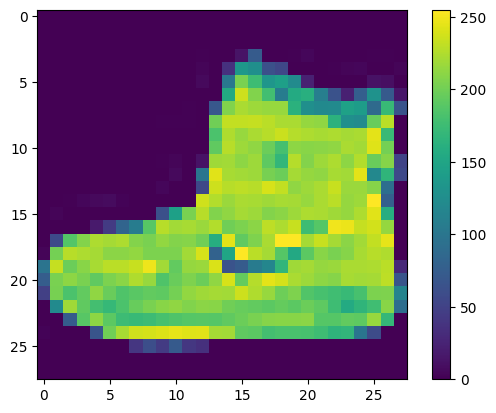

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Normalizing the data
train_images = train_images / 255.0
test_images = test_images / 255.0

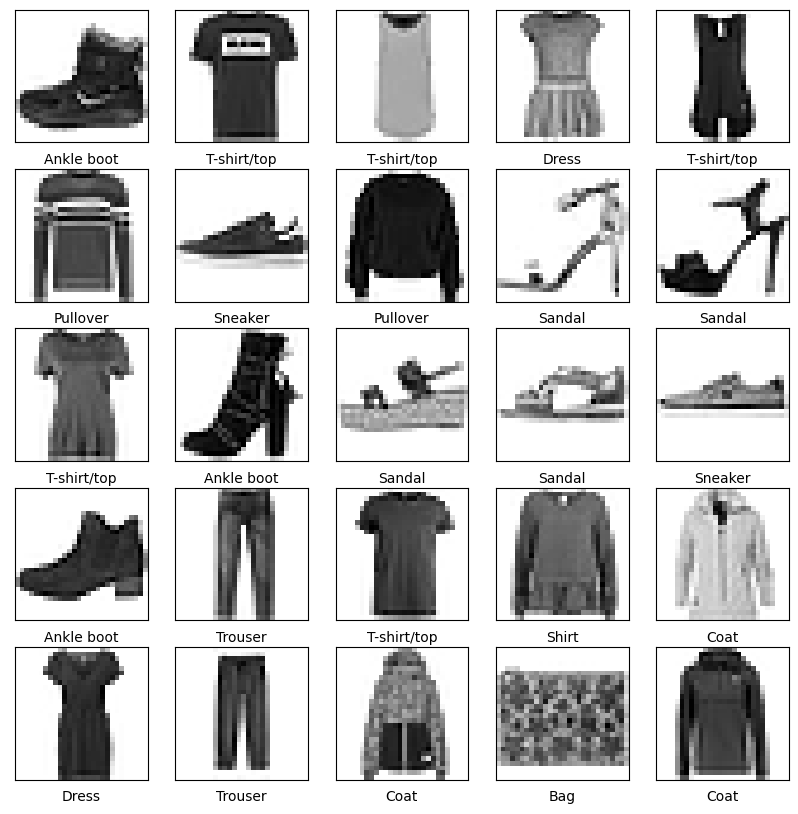

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model

### Training

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4987 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3744 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3360 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3090 - accuracy: 0.8872
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2942 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2805 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2681 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2573 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2491 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.241

### Testing

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3531 - accuracy: 0.8793 - 752ms/epoch - 2ms/step

Test accuracy: 0.8792999982833862


### Predictions

In [13]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [14]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

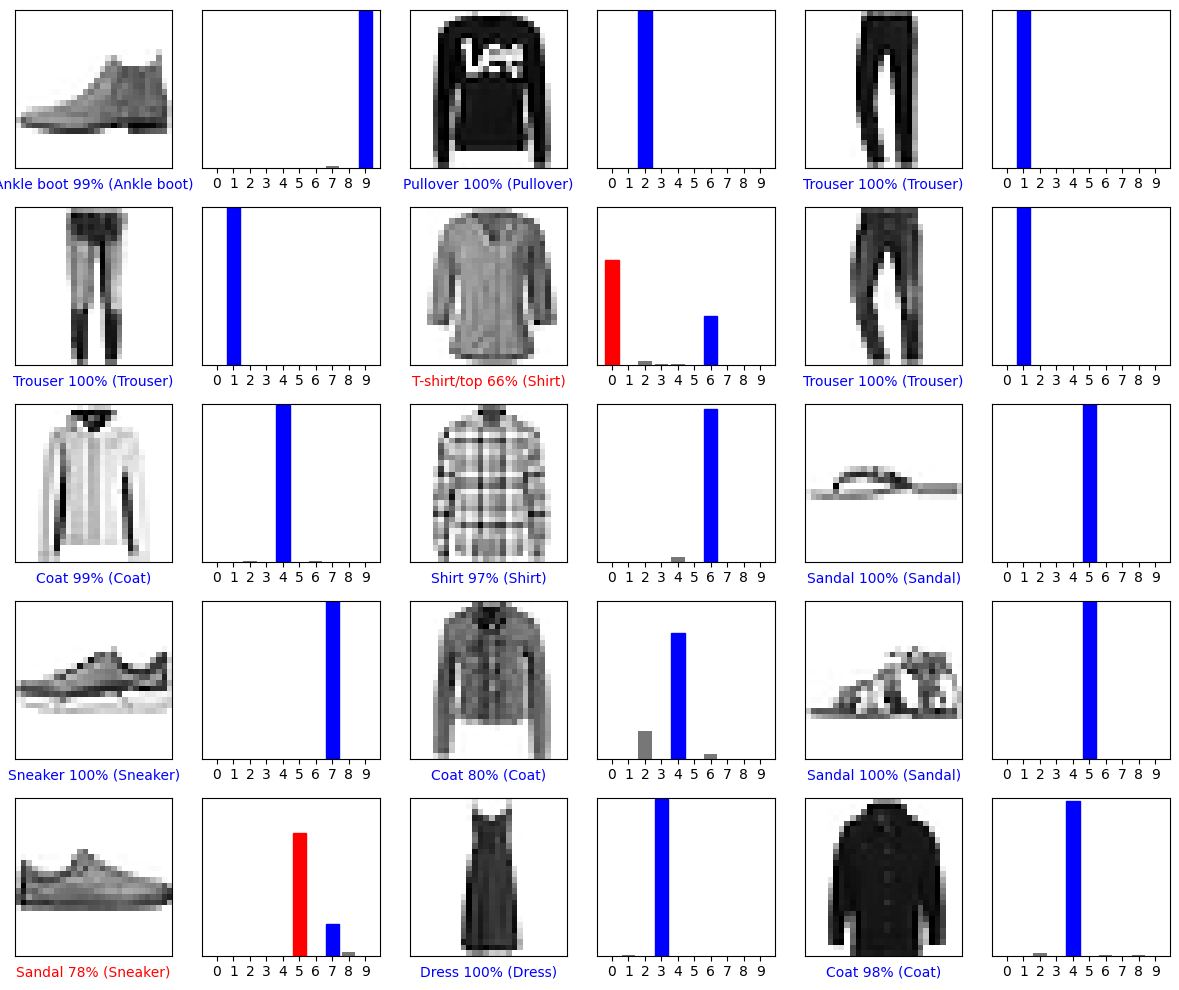

In [15]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 23ms/step
[[6.9831135e-06 3.8589307e-14 9.9987626e-01 5.8718884e-11 9.9637131e-05
  1.0146604e-10 1.7087179e-05 4.9299812e-15 1.6002662e-10 8.4387054e-17]]


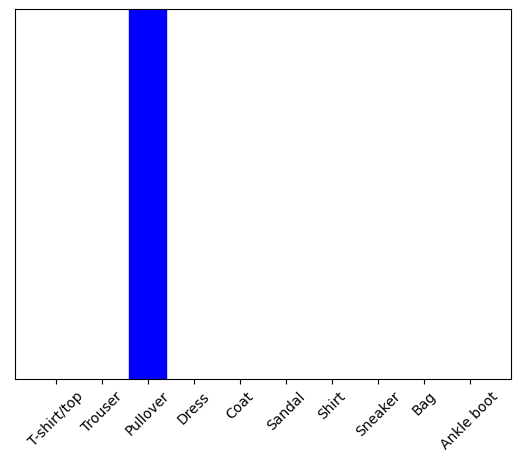

In [16]:
# Single Item Prediction
img = test_images[1]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = probability_model.predict(img)
print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [17]:
np.argmax(predictions_single[0])
# Prediction works as intended.

2